# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [ ]:
# Details Student 1:

# Details Student 2:


## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [1]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [2]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [ ]:
# word net installation:

# unmark if you want to use and need to install
# !pip install wn
# !python -m wn download omw-he:1.4

In [ ]:
# word net import:

# unmark if you want to use:
# import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [ ]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# !pip install hebrew_tokenizer

In [ ]:
# Hebrew tokenizer import:

# unmark if you want to use:
# import hebrew_tokenizer as ht

### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [3]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [4]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

## Gender Distribution in Stories

This pie chart visualizes the distribution of genders (Male and Female) within a dataset of stories. Each slice of the pie represents the proportion of each gender in the dataset.

### Interpretation:

- **Male (M)**: This segment of the pie chart represents 76.4% of the stories, indicating a significant majority of male protagonists or male-focused content.

- **Female (F)**: This segment of the pie chart represents the remaining 23.6% of the stories, featuring female protagonists or female-focused content.

### Insights:

- The dominant presence of male-focused content, as indicated by the large Male segment, suggests a notable gender imbalance in the provided stories dataset.
- The Female segment, while smaller, still represents a meaningful portion of the dataset, showcasing diversity in gender representation within the stories.

This visualization highlights that a majority of the stories in the dataset feature male protagonists or themes, with only a minority featuring female protagonists or content.


<Figure size 600x600 with 0 Axes>

([<matplotlib.patches.Wedge at 0x1fd321527a0>,
 [Text(0.14263080614858145, -1.090713735650838, 'm'),
  Text(-0.1426308061485813, 1.090713735650838, 'f')],
 [Text(0.07779862153558988, -0.594934764900457, '76.4%'),
  Text(-0.07779862153558981, 0.594934764900457, '23.6%')])

Text(0.5, 1.0, 'Gender Distribution in Stories')

(-1.099999934853671,
 1.0999999737654125,
 -1.0999997135513309,
 1.0999958408235668)

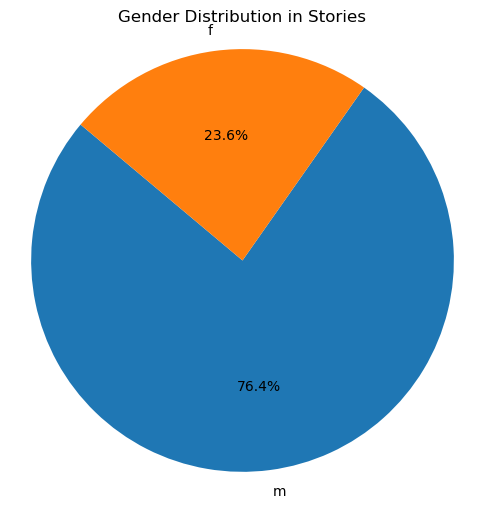

In [7]:

# Count the occurrences of each gender
gender_counts = df_train['gender'].value_counts()

# Create a pie chart to visualize the gender distribution
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)  # Create a pie chart
plt.title('Gender Distribution in Stories')  # Title for the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()  # Display the plot

In [8]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

In [9]:
# Define a function to clean and preprocess text
def clean_text(text):
    # Replace non-Hebrew characters with spaces
    text = re.sub(r'[^א-ת\s]', ' ', text)
    # Remove leading and trailing spaces
    text = text.strip()
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    return text

### Your implementation:
Write your code solution in the following code-cells

# Data Cleaning, preparation and vectorization
#### The next cell of code I'm going to do pre-preparation of the data and vectorization by words.


In [10]:
# Extract the 'story' column as a list
df_train_X = df_train['story'].tolist()

# Apply the clean_text function to each sentence in df_train_X
corpus = [clean_text(sen) for sen in df_train_X]

# Use LabelEncoder to encode the 'gender' column
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(df_train['gender'])


In [23]:
# Print the first 5 sentences in the corpus
for i, story in enumerate(corpus[:5], start=1):
    print(f"Story {i}: {story}")

Story 1: כשחבר הזמין אותי לחול לא באמת חשבתי שזה יקרה פשוט אמרתי לו כן ותיארתי לעצני שזה יתבטל אחרי שבועיים בערך אני מקבל טלפוןם ממנו שומע מצאתי אחלה מקודות שנוטכל טייל בהם ואז הבנתי שזה הולך לקרות התחלתי להתארגןם על דברים ציוד להליכה תיקים בגדים חמים כסף ודרכון מעודכן לאחר תכנונים נפגשנו בשדה הוא הביא לי את אחד מהתיקים שלו כי לי אין תיק טוב לטיולים ועלינו למטוס לאיטליה בטיסה עצמה לא הצלחתי לישון היה ילד קטן שבכה כל הדרך מעצבן כשהגענו הלכנו ישר לסוכנות השכרת הרכב ולקחנו את הרכב שהזמנו מראש סיטרואל בצבע סגול כי זה מה שנשאר חצי קראנו לה עלינו על חצי והתחלנו את המסע לכיוון אגם גארדה השעה הייתה בערב קצת קריר בחוץ חושך מוות ואין לנו מושג לאן אנחנו נוסעים רק עם בהתחלה התחלנו לחפש מקום לישון בו מצאנו עיירה סמוכה והחלטנו ללכת לשם על הדרך עצרנו בפיצה הםיצה הראשונה באיטליה משם המשכנו לעיירה עצמה ומצאנו אכסנייה די נחמדה שבה עצרנו ללילה בבוקר שלמחורת הוא מצא מסלול טיול על אחד ההרים באזור נסענו לשם נסיעה של כשעה בערך התחלנו לעלות עם הרכב לכיוון המסלול הדרך הייתה נופית עצים ויער מכל כיוון עד שבאיזשה

In [12]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(df_train.loc[:, 'gender'])

In [13]:
vectorize = TfidfVectorizer(min_df=5, max_df=0.7)
vectorize.fit(corpus)
train_X = vectorize.transform(corpus)
test_X = vectorize.transform(df_test.loc[:, 'story'])

TfidfVectorizer(max_df=0.7, min_df=5)

# Grid search MLP for KNN and decision Tree hyperparamters

In [14]:
train_X, valid_X, train_y, valid_y = model_selection.train_test_split(train_X, train_y, test_size=0.2, random_state=0)

In [15]:
# Hyperparameters grid for KNeighborsClassifier
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# GridSearchCV for KNeighborsClassifier
knn_search = GridSearchCV(KNeighborsClassifier(), knn_params, cv=3, scoring='f1_macro', verbose=1, n_jobs=-1)
knn_search.fit(train_X, train_y)

# Print the best hyperparameters for KNeighborsClassifier
print("Best hyperparameters for KNeighborsClassifier:")
print(knn_search.best_params_)

# Hyperparameters grid for DecisionTreeClassifier
tree_params = {
    'criterion': ['gini'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}

tree_search = GridSearchCV(DecisionTreeClassifier(random_state=0), tree_params, cv=3, scoring='f1_macro', verbose=1, n_jobs=-1)
tree_search.fit(train_X, train_y)

print("\nBest parameters for DecisionTreeClassifier:")
print(tree_search.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='f1_macro', verbose=1)

Best hyperparameters for KNeighborsClassifier:
{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [10, 20],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 5]},
             scoring='f1_macro', verbose=1)


Best parameters for DecisionTreeClassifier:
{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [17]:
PredictionModels = {
    "KNeighborsClassifier": KNeighborsClassifier(**knn_search.best_params_),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=0, **tree_search.best_params_),
}

In [18]:
best_f1_avg = 0
best_model_name = ""
best_model = None

model_results = {}

for model_name, model in PredictionModels.items():
    model.fit(train_X, train_y)
    valid_pred = model.predict(valid_X)
    
    # Calculate F1 scores for each class
    f1_scores = f1_score(valid_y, valid_pred, average=None)
    
    # Calculate the average F1 score
    f1_average = sum(f1_scores) / len(f1_scores)
    
    model_results[model_name] = f1_average

    if f1_average > best_f1_avg:
        best_f1_avg = f1_average
        best_model_name = model_name
        best_model = model

    print(f"{model_name} - Average f1-score: {f1_average:.3f}")

print(f"\nBest model is {best_model_name} with average F1-score of {best_f1_avg:.3f}")

# To access the results of all models:
for model_name, f1_avg in model_results.items():
    print(f"{model_name} - Average f1-score: {f1_avg:.3f}")

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

KNeighborsClassifier - Average f1-score: 0.600


DecisionTreeClassifier(max_depth=20, min_samples_split=5, random_state=0)

DecisionTreeClassifier - Average f1-score: 0.715

Best model is DecisionTreeClassifier with average F1-score of 0.715
KNeighborsClassifier - Average f1-score: 0.600
DecisionTreeClassifier - Average f1-score: 0.715


In [19]:
test_pred = best_model.predict(test_X)


In [20]:
test_pred = best_model.predict(test_X)

df_test['predicted_category'] = test_pred

df_predicted = df_test[['test_example_id', 'predicted_category']]

df_predicted.head()

,test_example_id,predicted_category
0,0,0
1,1,1
2,2,1
3,3,1
4,4,0


### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [21]:
df_predicted.to_csv('classification_results.csv',index=False)